In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import numpy as np

In [3]:
#read dataset
df = pd.read_csv('events_1729243.csv')

In [4]:
#watch what we have
df.head()

,league,season,game,id,game_id,period,minute,second,expanded_minute,type,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
0,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209451,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'TeamFormation', 'va...",False,NaN,NaN,NaN,NaN,NaN
1,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209477,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'JerseyNumber', 'val...",False,NaN,NaN,NaN,NaN,NaN
2,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287459,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
3,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287467,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
4,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287487,1729243,FirstHalf,0,0.0,0,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN


In [5]:
#define columns format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   league             1599 non-null   object 
 1   season             1599 non-null   int64  
 2   game               1599 non-null   object 
 3   id                 1599 non-null   int64  
 4   game_id            1599 non-null   int64  
 5   period             1599 non-null   object 
 6   minute             1599 non-null   int64  
 7   second             1598 non-null   float64
 8   expanded_minute    1599 non-null   int64  
 9   type               1599 non-null   object 
 10  outcome_type       1599 non-null   object 
 11  team_id            1599 non-null   int64  
 12  team               1599 non-null   object 
 13  player_id          1581 non-null   float64
 14  player             1581 non-null   object 
 15  x                  1599 non-null   float64
 16  y                  1599 

## Heatmap

In [6]:
#Define dataframes by the teams
df_MC_hm = df[(df['team'] == 'Man City')&(df['outcome_type'] == 'Successful')][['minute', 'second', 'team', 'player','type', 'outcome_type','x','y', 'end_x','end_y']]
df_Ch_hm = df[(df['team'] == 'Chelsea')&(df['outcome_type'] == 'Successful')][['minute', 'second', 'team', 'player','type', 'outcome_type','x','y', 'end_x','end_y']]

<Axes: >

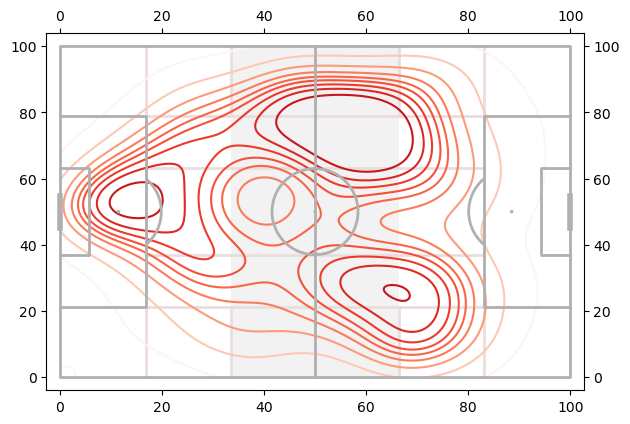

In [7]:
#make a pitch with data from OPTA and with a mention of the thirds and draw the heatmap for MC
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = pitch.draw()
pitch.kdeplot(df_MC_hm['x'], df_MC_hm['y'], ax=ax, cmap = 'Reds', zorder=1)

<Axes: >

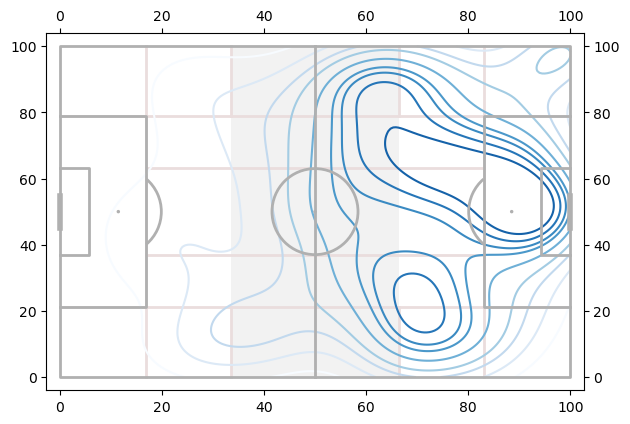

In [8]:
#make a pitch with data from OPTA and with a mention of the thirds and draw the heatmap for Chelsea
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = pitch.draw()
pitch.kdeplot(100 - df_Ch_hm['x'], 100 - df_Ch_hm['y'], ax=ax, cmap = 'Blues', zorder=1)

## Passing networks

### Man city

In [9]:
#define a passer and a pass recipient and add the columns
df_MC_pn = df[df['team'] == 'Man City']
df_MC_pn['passer'] = df_MC_pn['player_id']
df_MC_pn['recipient'] = df_MC_pn['player_id'].shift(-1)


#Define the first substitution, all passes would be drown before the first sub.
subs_MC = df_MC_pn[df_MC_pn['type'] == 'SubstitutionOff']# всі замінені
firstsub_MC = subs_MC['minute'].min()

#Define successful passes
MC_successful_passes = df_MC_pn[(df_MC_pn['type'] == 'Pass')&(df_MC_pn['outcome_type'] == 'Successful')\
                                &(df_MC_pn['minute'] < firstsub_MC)]

C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\2383605639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_pn['passer'] = df_MC_pn['player_id']
C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\2383605639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_pn['recipient'] = df_MC_pn['player_id'].shift(-1)


In [10]:
MC_successful_passes.head()

,league,season,game,id,game_id,period,minute,second,expanded_minute,type,...,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id,passer,recipient
41,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617289205,1729243,FirstHalf,1,30.0,1,Pass,...,NaN,"[{'type': {'displayName': 'Angle', 'value': 21...",True,NaN,NaN,NaN,NaN,NaN,69778.0,121774.0
42,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617289283,1729243,FirstHalf,1,32.0,1,Pass,...,NaN,"[{'type': {'displayName': 'PassEndX', 'value':...",True,NaN,NaN,NaN,NaN,NaN,121774.0,313171.0
43,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617289331,1729243,FirstHalf,1,36.0,1,Pass,...,NaN,"[{'type': {'displayName': 'StandingSave', 'val...",True,NaN,NaN,NaN,NaN,NaN,313171.0,69778.0
44,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617289377,1729243,FirstHalf,1,39.0,1,Pass,...,NaN,"[{'type': {'displayName': 'PassEndX', 'value':...",True,NaN,NaN,NaN,NaN,NaN,69778.0,121774.0
45,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617289435,1729243,FirstHalf,1,42.0,1,Pass,...,NaN,"[{'type': {'displayName': 'Angle', 'value': 21...",True,NaN,NaN,NaN,NaN,NaN,121774.0,402664.0


In [11]:
#Define an average player's location and quantity of passes 
MC_average_locations = MC_successful_passes.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})

In [12]:
MC_average_locations.columns = ['x', 'y', 'count']

In [13]:
MC_average_locations

,x,y,count
passer,,,
69778.0,51.050000,18.076667,30
121774.0,15.290323,55.116129,31
136741.0,52.521429,71.689286,28
297390.0,40.767647,64.567647,34
303139.0,50.658537,47.556098,41
313171.0,39.100000,38.969231,52
315227.0,54.475000,48.900000,8
331254.0,70.226316,22.452632,19
365409.0,60.200000,36.436842,19


In [14]:
#players names
df_player_name = df.groupby(["team", 'player_id', 'player']).id.count().reset_index()
df_player_name = df_player_name.set_index('player_id')
print(df_player_name)

               team            player   id
player_id                                 
28550.0     Chelsea      Thiago Silva   67
97692.0     Chelsea   Raheem Sterling   74
300426.0    Chelsea       Axel Disasi   88
361330.0    Chelsea       Reece James   56
362151.0    Chelsea    Robert Sánchez   60
363496.0    Chelsea    Marc Cucurella   68
369430.0    Chelsea    Enzo Fernández   59
375621.0    Chelsea   Conor Gallagher   73
393407.0    Chelsea     Armando Broja    6
395692.0    Chelsea       Cole Palmer   60
403850.0    Chelsea        Malo Gusto   34
404616.0    Chelsea  Lesley Ugochukwu    1
409376.0    Chelsea   Mykhailo Mudryk   10
410175.0    Chelsea    Moisés Caicedo   51
426050.0    Chelsea   Nicolas Jackson   28
69778.0    Man City       Kyle Walker   82
93894.0    Man City     Mateo Kovacic   19
113069.0   Man City     Jack Grealish   36
121774.0   Man City           Ederson   59
136741.0   Man City    Bernardo Silva   77
297390.0   Man City     Manuel Akanji   78
303139.0   

In [15]:
MC_average_locations= MC_average_locations.merge(df_player_name[['player']], how='left', left_on='passer', right_index=True) \
        .rename(columns={'player': 'player_name'}) 

In [16]:
MC_average_locations

,x,y,count,player_name
passer,,,,
69778.0,51.050000,18.076667,30,Kyle Walker
121774.0,15.290323,55.116129,31,Ederson
136741.0,52.521429,71.689286,28,Bernardo Silva
297390.0,40.767647,64.567647,34,Manuel Akanji
303139.0,50.658537,47.556098,41,Rodri
313171.0,39.100000,38.969231,52,Rúben Dias
315227.0,54.475000,48.900000,8,Erling Haaland
331254.0,70.226316,22.452632,19,Phil Foden
365409.0,60.200000,36.436842,19,Julián Álvarez


In [17]:
#Count passes
pass_between_MC = MC_successful_passes.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between_MC.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between_MC = pass_between_MC.merge(MC_average_locations, left_on ='passer', right_index = True)
pass_between_MC = pass_between_MC.merge(MC_average_locations, left_on ='recipient', right_index = True, suffixes=['', '_end'])


print(pass_between_MC)

      passer  recipient  pass_count          x          y  count  \
0    69778.0   121774.0           5  51.050000  18.076667     30   
14  136741.0   121774.0           2  52.521429  71.689286     28   
24  297390.0   121774.0           4  40.767647  64.567647     34   
33  303139.0   121774.0           2  50.658537  47.556098     41   
42  313171.0   121774.0          10  39.100000  38.969231     52   
..       ...        ...         ...        ...        ...    ...   
39  303139.0   388098.0           4  50.658537  47.556098     41   
49  313171.0   388098.0           2  39.100000  38.969231     52   
55  315227.0   388098.0           1  54.475000  48.900000      8   
69  365409.0   388098.0           2  60.200000  36.436842     19   
85  402664.0   388098.0           6  52.450000  82.921429     42   

       player_name      x_end      y_end  count_end player_name_end  
0      Kyle Walker  15.290323  55.116129         31         Ederson  
14  Bernardo Silva  15.290323  55.116129   

In [18]:
#Define average statistics
pass_between_MC.describe()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
count,86.000000,86.0000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000
mean,278290.279070,281171.0000,3.651163,49.478334,52.463011,30.151163,51.356143,50.560762,29.55814
std,104253.030463,106439.0034,2.669071,14.464286,19.091937,13.136852,13.796384,20.524605,13.12349
min,69778.000000,69778.0000,1.000000,15.290323,18.076667,8.000000,15.290323,18.076667,8.00000
25%,136741.000000,176903.2500,2.000000,40.767647,38.969231,19.000000,43.240369,36.436842,19.00000
50%,313171.000000,313171.0000,3.000000,52.450000,48.900000,31.000000,52.450000,48.900000,30.00000
75%,356870.250000,365409.0000,5.750000,54.475000,70.830000,41.000000,60.200000,70.830000,41.00000
max,402664.000000,402664.0000,12.000000,70.226316,82.921429,52.000000,70.226316,82.921429,52.00000


In [19]:
#Reduct the pass_between to median pass_count
pass_between_MC_reducted = pass_between_MC[pass_between_MC['pass_count']>3]
pass_between_MC_reducted.head()

,passer,recipient,pass_count,x,y,count,player_name,x_end,y_end,count_end,player_name_end
0,69778.0,121774.0,5,51.050000,18.076667,30,Kyle Walker,15.290323,55.116129,31,Ederson
24,297390.0,121774.0,4,40.767647,64.567647,34,Manuel Akanji,15.290323,55.116129,31,Ederson
42,313171.0,121774.0,10,39.100000,38.969231,52,Rúben Dias,15.290323,55.116129,31,Ederson
1,69778.0,297390.0,5,51.050000,18.076667,30,Kyle Walker,40.767647,64.567647,34,Manuel Akanji
7,121774.0,297390.0,7,15.290323,55.116129,31,Ederson,40.767647,64.567647,34,Manuel Akanji


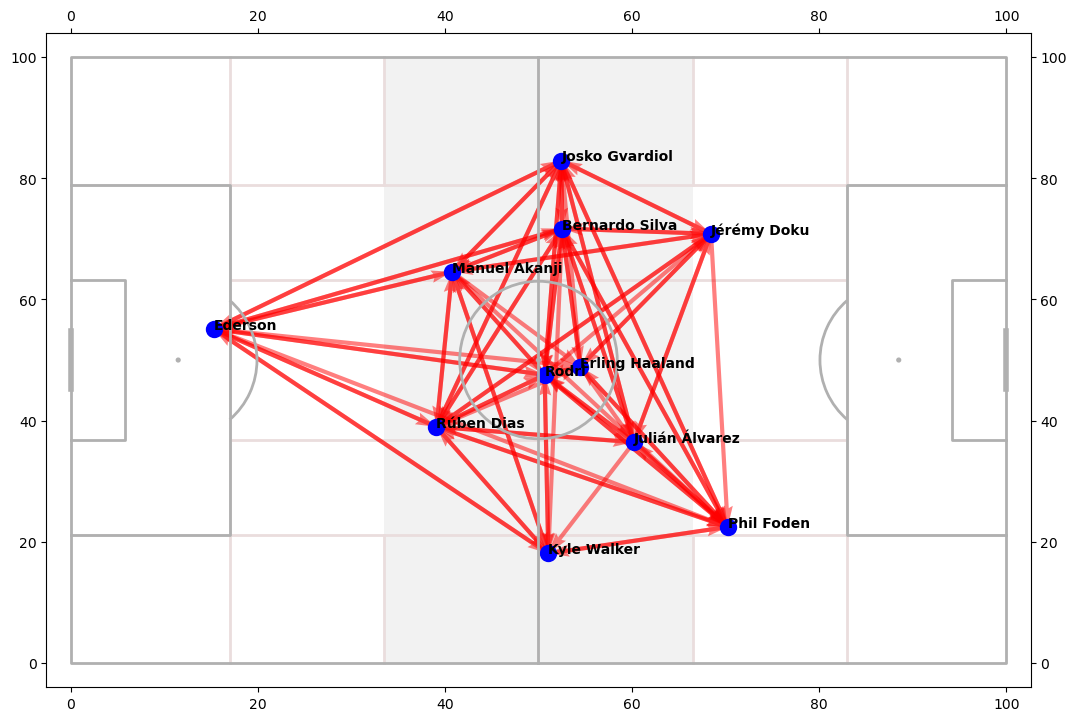

In [20]:
#Put the pass network on the pitch
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = plt.subplots(figsize=(13, 8.5))

pitch.draw(ax=ax)


arrows = pitch.arrows(pass_between_MC.x, pass_between_MC.y, pass_between_MC.x_end, pass_between_MC.y_end, ax=ax, \
                      width =3, headwidth=3, color = 'red', zorder = 1, alpha = 0.5)

nodes = pitch.scatter(MC_average_locations.x, MC_average_locations.y, s =100, color = "blue", linewidth = 2.5, \
                      alpha =1, zorder = 1, ax=ax)

for i, row in MC_average_locations.iterrows():
    pitch.annotate(row.player_name, (MC_average_locations.x[i], MC_average_locations.y[i]), c='black', \
                   weight = "bold", size=10, ax=ax, zorder = 4)

### MC the full match with substitution

In [21]:
#define a passer and a pass recipient and add the columns
df_MC_pn_ext = df[df['team'] == 'Man City']
df_MC_pn_ext['passer'] = df_MC_pn_ext['player_id']
df_MC_pn_ext['recipient'] = df_MC_pn_ext['player_id'].shift(-1)

#Define successful passes
MC_successful_passes_ext = df_MC_pn_ext[(df_MC_pn_ext['type'] == 'Pass')&(df_MC_pn_ext['outcome_type'] == 'Successful')]
                                

C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\447378941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_pn_ext['passer'] = df_MC_pn_ext['player_id']
C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\447378941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_pn_ext['recipient'] = df_MC_pn_ext['player_id'].shift(-1)


In [22]:
#Define an average player's location and quantity of passes 
MC_average_locations_ext = MC_successful_passes_ext.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})

In [23]:
MC_average_locations_ext.columns = ['x', 'y', 'count']

In [24]:
MC_average_locations_ext= MC_average_locations_ext.merge(df_player_name[['player']], how='left', left_on='passer', right_index=True) \
        .rename(columns={'player': 'player_name'}) 

In [25]:
#Count passes
pass_between_MC_ext = MC_successful_passes_ext.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between_MC_ext.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between_MC_ext = pass_between_MC_ext.merge(MC_average_locations_ext, left_on ='passer', right_index = True)
pass_between_MC_ext = pass_between_MC_ext.merge(MC_average_locations_ext, left_on ='recipient', right_index = True, suffixes=['', '_end'])


print(pass_between_MC_ext)

       passer  recipient  pass_count          x          y  count  \
0     69778.0   121774.0           6  53.659091  16.763636     44   
15   113069.0   121774.0           1  71.540000  79.460000     15   
34   136741.0   121774.0           2  55.897917  62.527083     48   
46   297390.0   121774.0           5  41.710526  67.431579     57   
57   303139.0   121774.0           3  52.832836  46.425373     67   
..        ...        ...         ...        ...        ...    ...   
64   303139.0   388098.0           4  52.832836  46.425373     67   
75   313171.0   388098.0           2  40.831579  37.307895     76   
83   315227.0   388098.0           1  61.230000  52.780000     10   
101  365409.0   388098.0           2  64.851515  32.566667     33   
119  402664.0   388098.0           6  52.310000  84.065000     60   

        player_name  x_end  y_end  count_end player_name_end  
0       Kyle Walker  14.69  54.69         40         Ederson  
15    Jack Grealish  14.69  54.69         40 

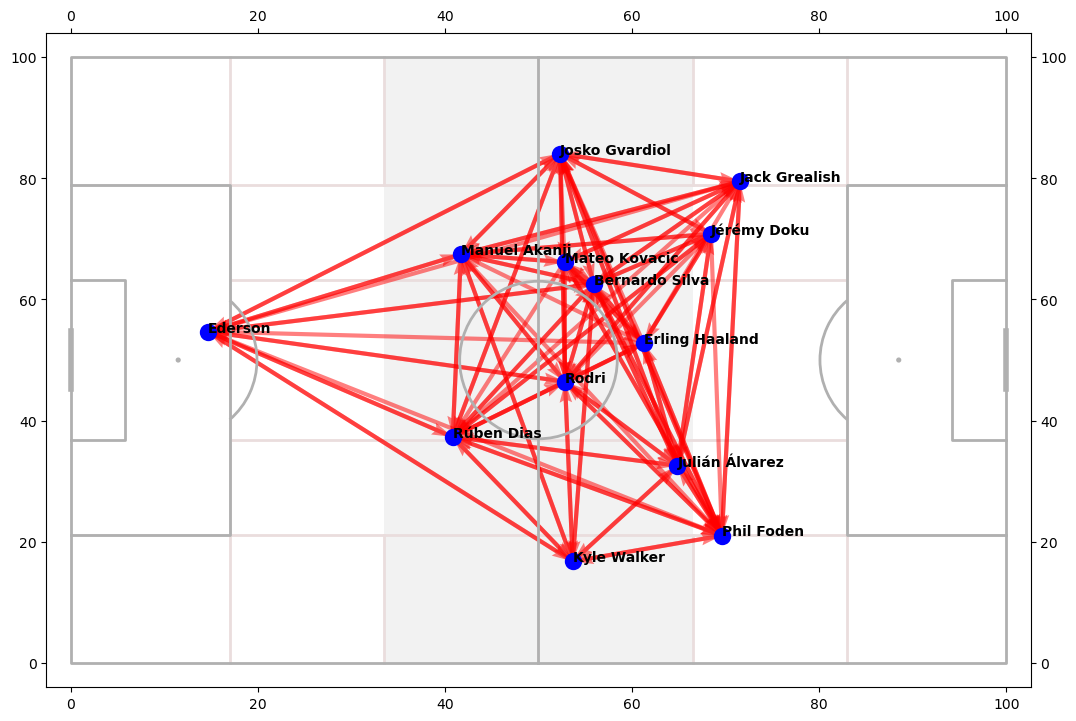

In [26]:
#Put the pass network on the pitch
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = plt.subplots(figsize=(13, 8.5))

pitch.draw(ax=ax)


arrows = pitch.arrows(pass_between_MC_ext.x, pass_between_MC_ext.y, pass_between_MC_ext.x_end, pass_between_MC_ext.y_end, ax=ax, \
                      width =3, headwidth=3, color = 'red', zorder = 1, alpha = 0.5)

nodes = pitch.scatter(MC_average_locations_ext.x, MC_average_locations_ext.y, s =100, color = "blue", linewidth = 2.5, \
                      alpha =1, zorder = 1, ax=ax)

for i, row in MC_average_locations_ext.iterrows():
    pitch.annotate(row.player_name, (MC_average_locations_ext.x[i], MC_average_locations_ext.y[i]), c='black', \
                   weight = "bold", size=10, ax=ax, zorder = 4)

### Chelsea

In [27]:
#define a passer and a pass recipient and add the columns
df_Ch_pn = df[df['team'] == 'Chelsea']
df_Ch_pn['passer'] = df_Ch_pn['player_id']
df_Ch_pn['recipient'] = df_Ch_pn['player_id'].shift(-1)

#Define the first substitution, all passes would be drown before the first sub.
subs_Ch = df_Ch_pn[df_Ch_pn['type'] == 'SubstitutionOff']
subs_Ch = subs_Ch['minute']
firstsub_Ch = subs_Ch.min()

#Define successful passes
Ch_successful_passes = df_Ch_pn[(df_Ch_pn['type'] == 'Pass')&(df_Ch_pn['outcome_type'] == 'Successful')&(df_Ch_pn['minute'] < firstsub_Ch)]

C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\2074840948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ch_pn['passer'] = df_Ch_pn['player_id']
C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\2074840948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ch_pn['recipient'] = df_Ch_pn['player_id'].shift(-1)


In [28]:
#Define an average player's location and quantity of passes 
Ch_average_locations = Ch_successful_passes.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
Ch_average_locations.columns = ['x', 'y', 'count']
Ch_average_locations

,x,y,count
passer,,,
28550.0,28.351724,58.068966,29
97692.0,66.050000,77.190000,10
300426.0,29.597059,32.829412,34
361330.0,43.459375,14.106250,32
362151.0,9.152174,45.560870,23
363496.0,36.950000,87.176923,26
369430.0,41.585714,68.780000,35
375621.0,60.055000,51.030000,20
395692.0,49.357895,33.852632,19


In [29]:
Ch_average_locations= Ch_average_locations.merge(df_player_name[['player']], how='left', left_on='passer', right_index=True) \
        .rename(columns={'player': 'player_name'}) 
Ch_average_locations.head()

,x,y,count,player_name
passer,,,,
28550.0,28.351724,58.068966,29,Thiago Silva
97692.0,66.050000,77.190000,10,Raheem Sterling
300426.0,29.597059,32.829412,34,Axel Disasi
361330.0,43.459375,14.106250,32,Reece James
362151.0,9.152174,45.560870,23,Robert Sánchez


In [30]:
#Count passes
pass_between_Ch = Ch_successful_passes.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between_Ch.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between_Ch = pass_between_Ch.merge(Ch_average_locations, left_on ='passer', right_index = True)
pass_between_Ch = pass_between_Ch.merge(Ch_average_locations, left_on ='recipient', right_index = True, suffixes=['', '_end'])
print(pass_between_Ch)

      passer  recipient  pass_count          x          y  count  \
0    28550.0   300426.0           6  28.351724  58.068966     29   
21  361330.0   300426.0           7  43.459375  14.106250     32   
29  362151.0   300426.0           5   9.152174  45.560870     23   
43  369430.0   300426.0           4  41.585714  68.780000     35   
53  375621.0   300426.0           1  60.055000  51.030000     20   
..       ...        ...         ...        ...        ...    ...   
36  363496.0    97692.0           4  36.950000  87.176923     26   
42  369430.0    97692.0           4  41.585714  68.780000     35   
52  375621.0    97692.0           8  60.055000  51.030000     20   
58  395692.0    97692.0           3  49.357895  33.852632     19   
67  410175.0    97692.0           1  36.475000  46.441667     24   

        player_name      x_end      y_end  count_end  player_name_end  
0      Thiago Silva  29.597059  32.829412         34      Axel Disasi  
21      Reece James  29.597059  32.8294

In [31]:
#Define average statistics
pass_between_Ch.describe()

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,323702.736842,314227.631579,3.368421,39.467582,49.715122,25.434211,41.661536,51.883768,24.500000
std,116397.167547,124844.109213,2.314258,14.953408,20.086292,8.057023,14.593437,20.544905,8.782558
min,28550.000000,28550.000000,1.000000,9.152174,14.106250,4.000000,9.152174,14.106250,4.000000
25%,346104.000000,300426.000000,2.000000,29.597059,33.852632,20.000000,29.597059,33.852632,20.000000
50%,363496.000000,363496.000000,3.000000,41.585714,46.441667,26.000000,41.585714,51.030000,25.000000
75%,375621.000000,380638.750000,4.000000,49.357895,68.780000,32.000000,49.357895,68.780000,32.000000
max,426050.000000,426050.000000,10.000000,66.050000,87.176923,35.000000,66.050000,87.176923,35.000000


In [32]:
#Reduct the pass_between to median pass_count
pass_between_reducted_Ch = pass_between_Ch[pass_between_Ch['pass_count']>3]

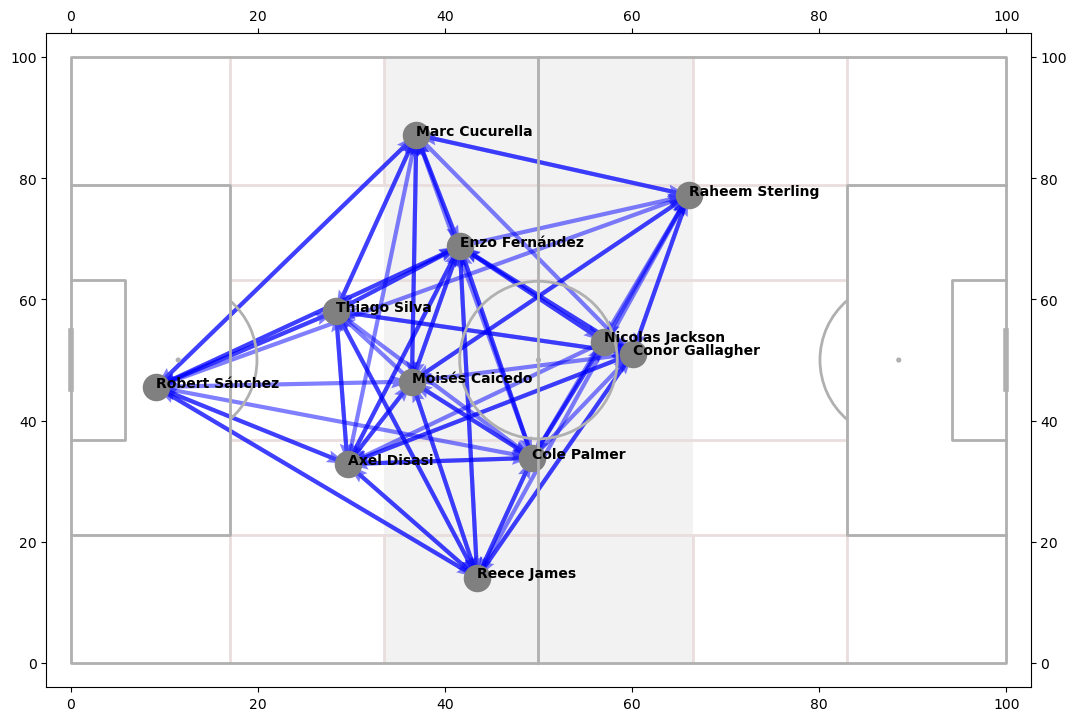

In [33]:
#Put the pass network on the pitch
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = plt.subplots(figsize=(13, 8.5))

pitch.draw(ax=ax)

arrows = pitch.arrows(pass_between_Ch.x, pass_between_Ch.y, pass_between_Ch.x_end, pass_between_Ch.y_end, ax=ax, width =3, headwidth=3, color = 'blue', zorder = 1, alpha = 0.5)

nodes = pitch.scatter(Ch_average_locations.x, Ch_average_locations.y, s =300, color = "grey", linewidth = 2.5, alpha =1, zorder = 1, ax=ax)

for i, row in Ch_average_locations.iterrows():
    pitch.annotate(row.player_name, (Ch_average_locations.x[i], Ch_average_locations.y[i]), c='black', \
                   weight = "bold", size=10, ax=ax, zorder = 4)

### Chelsea the full match with substitution

In [34]:
#define a passer and a pass recipient and add the columns
df_Ch_pn_ext = df[df['team'] == 'Chelsea']
df_Ch_pn_ext['passer'] = df_Ch_pn_ext['player_id']
df_Ch_pn_ext['recipient'] = df_Ch_pn_ext['player_id'].shift(-1)


#Define successful passes
Ch_successful_passes_ext = df_Ch_pn_ext[(df_Ch_pn_ext['type'] == 'Pass')&(df_Ch_pn_ext['outcome_type'] == 'Successful')]

C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\1674711590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ch_pn_ext['passer'] = df_Ch_pn_ext['player_id']
C:\Users\ДмитроІєвлєв\AppData\Local\Temp\ipykernel_28528\1674711590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ch_pn_ext['recipient'] = df_Ch_pn_ext['player_id'].shift(-1)


In [35]:
#Define an average player's location and quantity of passes 
Ch_average_locations_ext = Ch_successful_passes_ext.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
Ch_average_locations_ext.columns = ['x', 'y', 'count']


In [36]:
Ch_average_locations_ext= Ch_average_locations_ext.merge(df_player_name[['player']], how='left', left_on='passer', right_index=True) \
        .rename(columns={'player': 'player_name'}) 


In [37]:
#Count passes
pass_between_Ch_ext = Ch_successful_passes_ext.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between_Ch_ext.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between_Ch_ext = pass_between_Ch_ext.merge(Ch_average_locations_ext, left_on ='passer', right_index = True)
pass_between_Ch_ext = pass_between_Ch_ext.merge(Ch_average_locations_ext, left_on ='recipient', right_index = True, suffixes=['', '_end'])
print(pass_between_Ch_ext)

      passer  recipient  pass_count          x          y  count  \
0    28550.0    28550.0           1  28.574510  63.405882     51   
17  300426.0    28550.0          15  26.877273  30.542424     66   
28  361330.0    28550.0           2  43.459375  14.106250     32   
36  362151.0    28550.0           6   9.584375  46.896875     32   
44  363496.0    28550.0           8  37.200000  87.405405     37   
..       ...        ...         ...        ...        ...    ...   
74  395692.0    97692.0           4  50.322222  35.629630     27   
83  403850.0    97692.0           4  41.656000  12.572000     25   
91  410175.0    97692.0           1  39.543333  46.743333     30   
50  363496.0   409376.0           2  37.200000  87.405405     37   
71  375621.0   409376.0           1  52.740000  46.137500     40   

        player_name      x_end      y_end  count_end  player_name_end  
0      Thiago Silva  28.574510  63.405882         51     Thiago Silva  
17      Axel Disasi  28.574510  63.4058

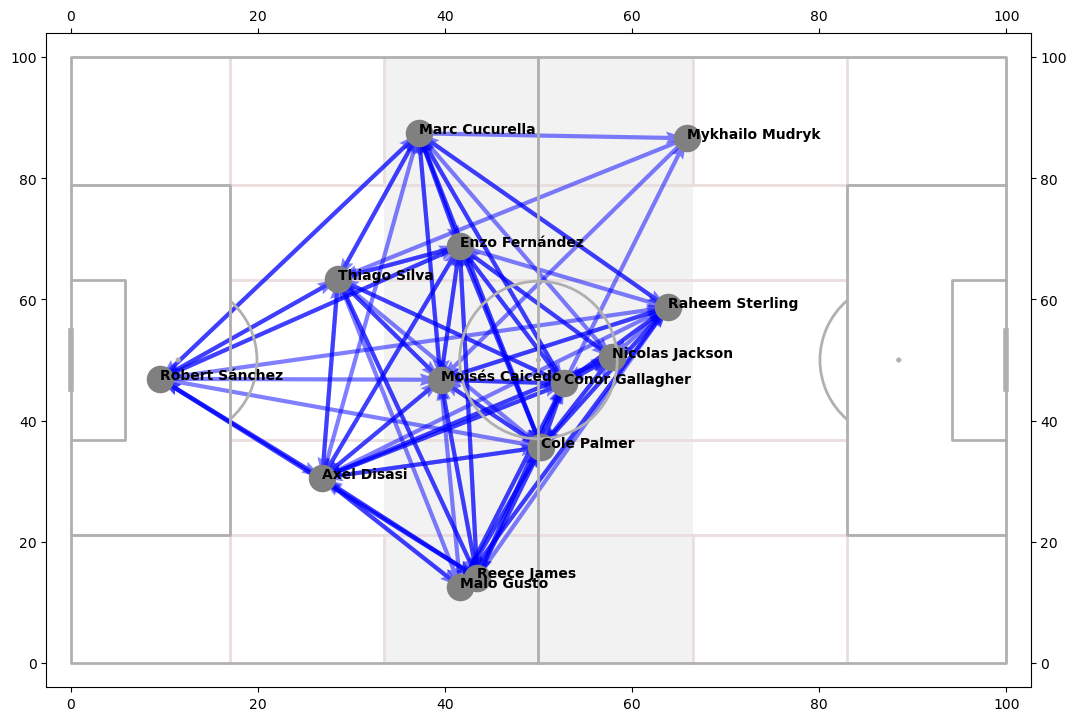

In [38]:
#Put the pass network on the pitch
pitch = Pitch(pitch_type='opta', positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2', axis=True, label=True, tick=True, line_zorder =2 )  
fig, ax = plt.subplots(figsize=(13, 8.5))

pitch.draw(ax=ax)

arrows = pitch.arrows(pass_between_Ch_ext.x, pass_between_Ch_ext.y, pass_between_Ch_ext.x_end, pass_between_Ch_ext.y_end, ax=ax, width =3, headwidth=3, color = 'blue', zorder = 1, alpha = 0.5)

nodes = pitch.scatter(Ch_average_locations_ext.x, Ch_average_locations_ext.y, s =300, color = "grey", linewidth = 2.5, alpha =1, zorder = 1, ax=ax)

for i, row in Ch_average_locations_ext.iterrows():
    pitch.annotate(row.player_name, (Ch_average_locations_ext.x[i], Ch_average_locations_ext.y[i]), c='black', \
                   weight = "bold", size=10, ax=ax, zorder = 4)

## Voronoi diagramm

In [39]:
MC_average_locations['Club'] = 'MC'
Ch_average_locations['Club'] = "Ch"
Average_locations = pd.concat([MC_average_locations, Ch_average_locations], names = ['MC', 'Ch'])
points = np.column_stack((Average_locations.x, Average_locations.y))
Average_locations

,x,y,count,player_name,Club
passer,,,,,
69778.0,51.050000,18.076667,30,Kyle Walker,MC
121774.0,15.290323,55.116129,31,Ederson,MC
136741.0,52.521429,71.689286,28,Bernardo Silva,MC
297390.0,40.767647,64.567647,34,Manuel Akanji,MC
303139.0,50.658537,47.556098,41,Rodri,MC
313171.0,39.100000,38.969231,52,Rúben Dias,MC
315227.0,54.475000,48.900000,8,Erling Haaland,MC
331254.0,70.226316,22.452632,19,Phil Foden,MC
365409.0,60.200000,36.436842,19,Julián Álvarez,MC


In [40]:

#pitch = Pitch(pitch_type='opta') 
#fig, ax = pitch.draw(figsize=(12,8))

#x = Average_locations['MC'].x
#y = Average_locations[.y
#team1, team2 = pitch.voronoi(x, y, Average_locations.Club)

#t1 = pitch.polygon(team1, ax=ax, fc = 'yellow', ec='white', lw =3, alpha = 0.4)
#t2 = pitch.polygon(team2, ax=ax, fc = 'blue', ec='white', lw =3, alpha = 0.4)


#sc1 = p.scatter(teammate_locs.x, teammate_locs.y, c='orange', s=80, ec='k', ax=ax)


## Shots map

In [41]:
#define dataframe with shots and goals
shots = df.loc[(df['type'] == 'SavedShot') | (df['type'] == 'Goal')].set_index('id')
#define team names
team1, team2 = df.team.unique()

In [42]:
#check df
shots.tail()

,league,season,game,game_id,period,minute,second,expanded_minute,type,outcome_type,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
id,,,,,,,,,,,,,,,,,,,,,
2617386379,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,1729243,SecondHalf,66,22.0,73,SavedShot,Successful,...,1.3,97.2,50.5,"[{'type': {'displayName': 'Assisted', 'value':...",True,True,NaN,NaN,546.0,410175.0
2617386415,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,1729243,SecondHalf,66,25.0,73,Goal,Successful,...,1.9,NaN,NaN,"[{'type': {'displayName': 'StandingSave', 'val...",True,True,True,NaN,NaN,NaN
2617404351,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,1729243,SecondHalf,85,30.0,92,SavedShot,Successful,...,19.0,83.6,49.5,"[{'type': {'displayName': 'LowCentre', 'value'...",True,True,NaN,NaN,819.0,315227.0
2617404379,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,1729243,SecondHalf,85,33.0,92,Goal,Successful,...,14.6,NaN,NaN,"[{'type': {'displayName': 'StandingSave', 'val...",True,True,True,NaN,822.0,315227.0
2617410983,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,1729243,SecondHalf,94,24.0,101,Goal,Successful,...,22.2,NaN,NaN,"[{'type': {'displayName': 'HighLeft', 'value':...",True,True,True,NaN,NaN,NaN


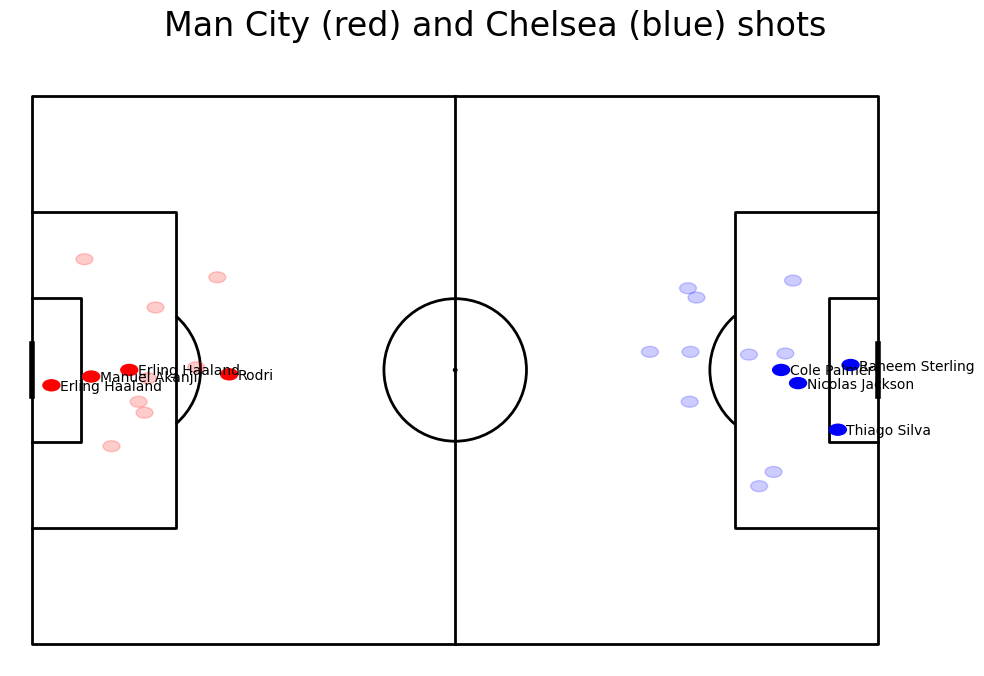

In [43]:
pitch = Pitch(pitch_type='opta', line_color = "black")
fig, ax = pitch.draw(figsize=(12,8))

#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['type']=='Goal'
    team_name=shot['team']
    #set circlesize
    circleSize=1
    #plot Chelsea
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="blue")
            plt.text(x+1,y-1,shot['player'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    #plot Man City
    else:
        if goal:
            shotCircle=plt.Circle((100-x,100 - y),circleSize,color="red") #https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_compare_pitches.html
            plt.text(100-x+1,100 - y - 1, shot['player']) #https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_compare_pitches.html
        else:
            shotCircle=plt.Circle((100-x,100 - y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    #set title
fig.suptitle("Man City (red) and Chelsea (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

## Plotting passes by players

### Chelsea

In [44]:
#prepare the dataframe of passes by Chelsea
mask_chelsea = (df.type == 'Pass') & (df.team == "Chelsea")
df_passes_ch = df.loc[mask_chelsea, ['x', 'y', 'end_x', 'end_y', 'player', 'outcome_type']]
#get the list of all players who made a pass
names_ch = df_passes_ch['player'].unique()

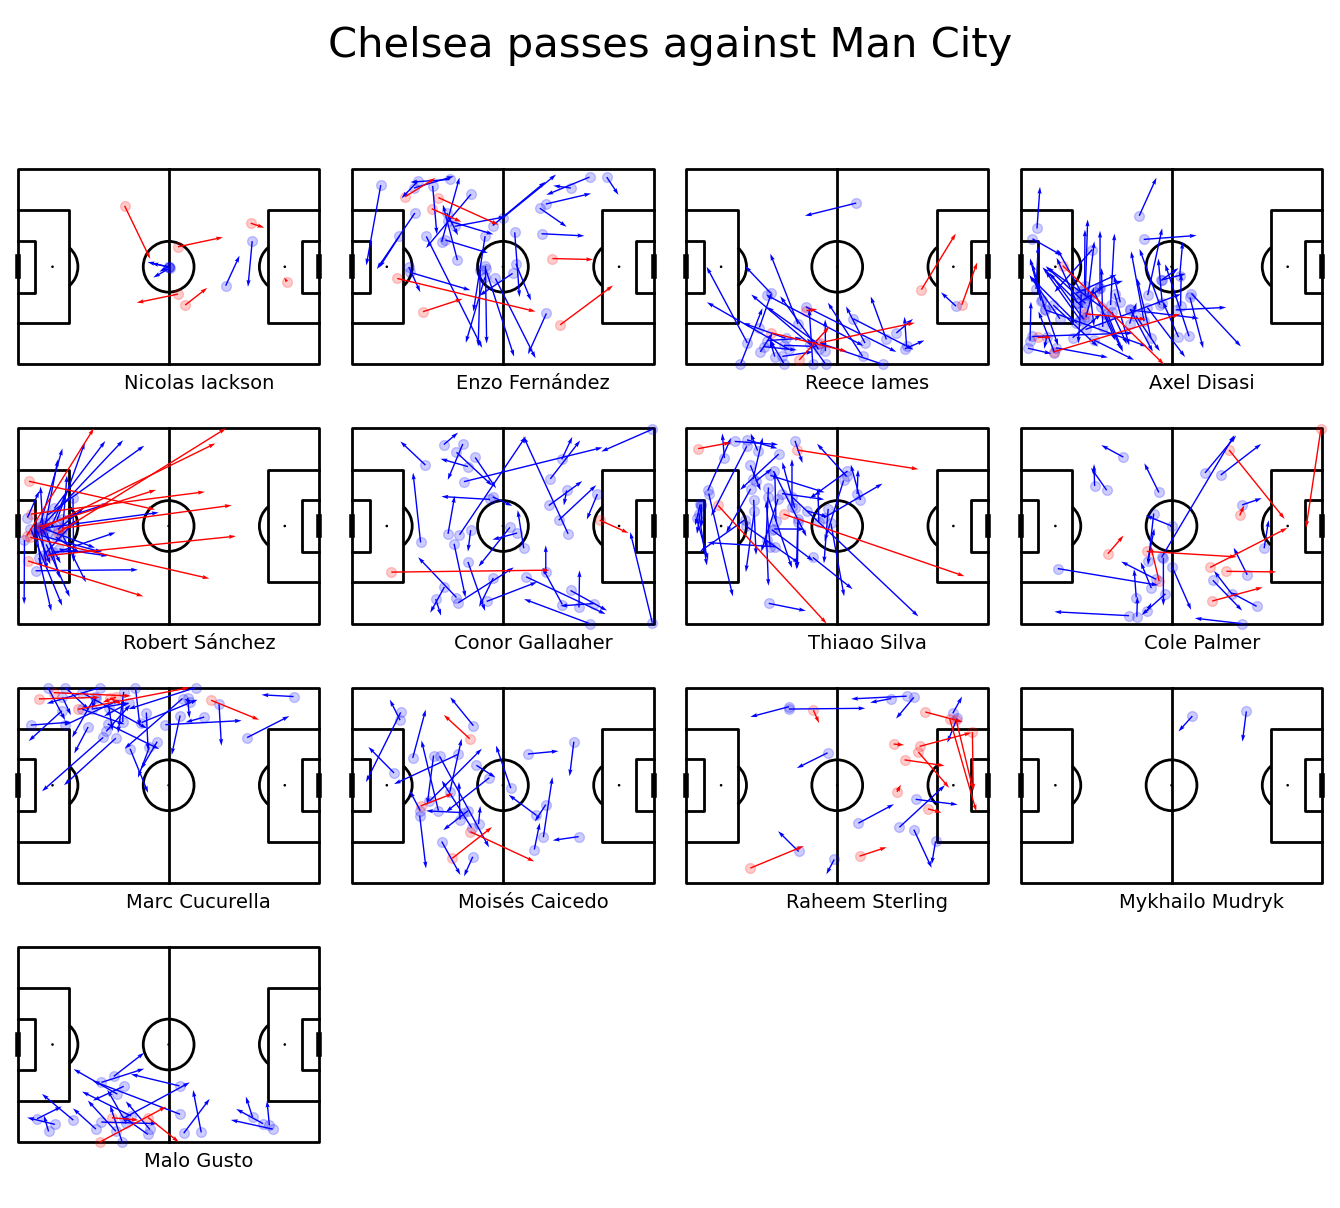

In [45]:
#draw 4x4 pitches
pitch = Pitch(pitch_type='opta', line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, figheight=12,  grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0)

#for each player
for name, ax in zip(names_ch, axs['pitch'].flat[:len(names_ch)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only successful passes by this player
    player_df_sc_ch = df_passes_ch.loc[(df_passes_ch["player"] == name) & (df_passes_ch["outcome_type"] == "Successful")]
    #take only unsuccessful passes by this player
    player_df_unsc_ch = df_passes_ch.loc[(df_passes_ch["player"] == name) & (df_passes_ch["outcome_type"] == "Unsuccessful")]
    
    #scatter
    pitch.scatter(player_df_sc_ch.x, player_df_sc_ch.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    pitch.scatter(player_df_unsc_ch.x, player_df_unsc_ch.y, alpha = 0.2, s = 50, color = "red", ax=ax)
    #plot arrow
    pitch.arrows(player_df_sc_ch.x, player_df_sc_ch.y,
            player_df_sc_ch.end_x, player_df_sc_ch.end_y, color = "blue", ax=ax, width=1)
    pitch.arrows(player_df_unsc_ch.x, player_df_unsc_ch.y,
            player_df_unsc_ch.end_x, player_df_unsc_ch.end_y, color = "red", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names_ch)-2:]:
    ax.remove()

    
#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'Chelsea passes against Man City', ha='center', va='center', fontsize=30)
plt.show()

### Man City

In [46]:
#prepare the dataframe of passes by Man City
mask_mc = (df.type == 'Pass') & (df.team == "Man City") 
df_passes_mc = df.loc[mask_mc, ['x', 'y', 'end_x', 'end_y', 'player', "outcome_type"]]
#get the list of all players who made a pass
names_mc = df_passes_mc['player'].unique()

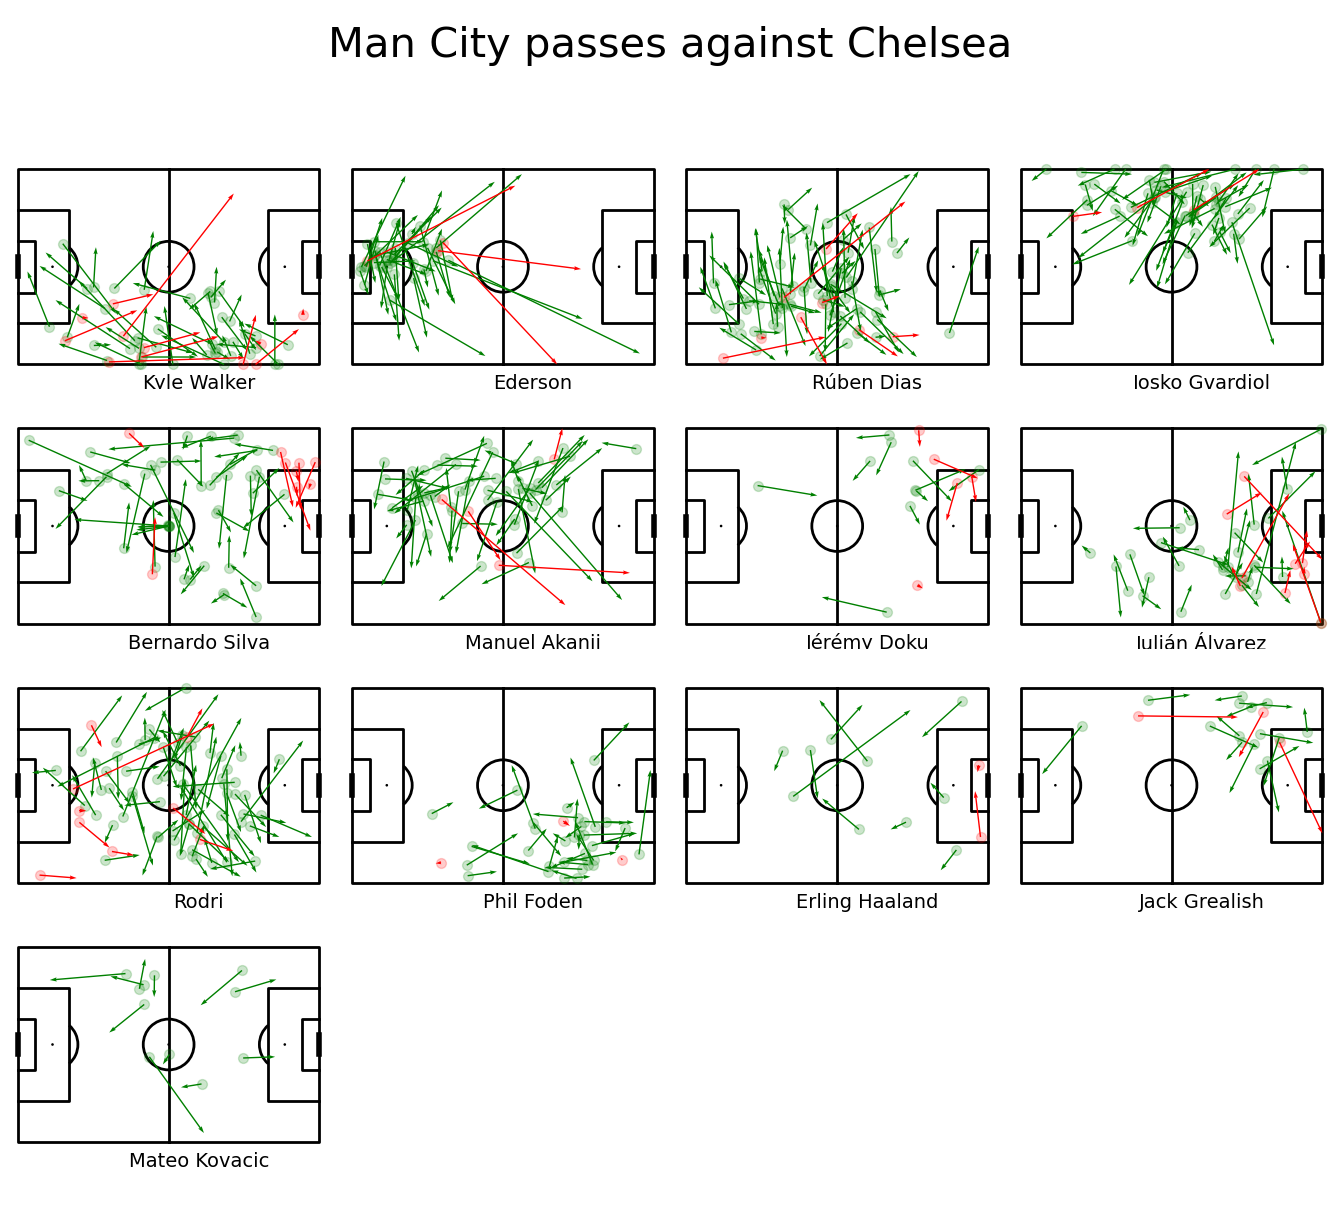

In [47]:
#draw 4x4 pitches
pitch = Pitch(pitch_type='opta', line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, figheight=12,  grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0)

#for each player
for name, ax in zip(names_mc, axs['pitch'].flat[:len(names_mc)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only successful passes by this player
    player_df_sc_mc = df_passes_mc.loc[(df_passes_mc["player"] == name) & (df_passes_mc["outcome_type"] == "Successful")]
    #take only unsuccessful passes by this player
    player_df_unsc_mc = df_passes_mc.loc[(df_passes_mc["player"] == name) & (df_passes_mc["outcome_type"] == "Unsuccessful")]
    
    #scatter
    pitch.scatter(player_df_sc_mc.x, player_df_sc_mc.y, alpha = 0.2, s = 50, color = "green", ax=ax)
    pitch.scatter(player_df_unsc_mc.x, player_df_unsc_mc.y, alpha = 0.2, s = 50, color = "red", ax=ax)
    #plot arrow
    pitch.arrows(player_df_sc_mc.x, player_df_sc_mc.y,
            player_df_sc_mc.end_x, player_df_sc_mc.end_y, color = "green", ax=ax, width=1)
    pitch.arrows(player_df_unsc_mc.x, player_df_unsc_mc.y,
            player_df_unsc_mc.end_x, player_df_unsc_mc.end_y, color = "red", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names_mc)-2:]:
    ax.remove()

    
#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'Man City passes against Chelsea', ha='center', va='center', fontsize=30)
plt.show()

In [48]:
df_passes_mc_ratio = df_passes_mc.reset_index().groupby(['player', 'outcome_type']).index.count()

In [49]:
df_passes_mc_ratio

player          outcome_type
Bernardo Silva  Successful      48
                Unsuccessful     9
Ederson         Successful      40
                Unsuccessful     3
Erling Haaland  Successful      10
                Unsuccessful     2
Jack Grealish   Successful      15
                Unsuccessful     3
Josko Gvardiol  Successful      60
                Unsuccessful     3
Julián Álvarez  Successful      33
                Unsuccessful     9
Jérémy Doku     Successful      10
                Unsuccessful     5
Kyle Walker     Successful      44
                Unsuccessful    11
Manuel Akanji   Successful      57
                Unsuccessful     4
Mateo Kovacic   Successful      11
Phil Foden      Successful      33
                Unsuccessful     3
Rodri           Successful      67
                Unsuccessful     9
Rúben Dias      Successful      76
                Unsuccessful     8
Name: index, dtype: int64

## Simulating results

In [58]:
#https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [59]:
#prediction before the match
epl = pd.read_csv('E0.csv')
epl = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})


In [60]:
goal_model_data = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  238
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -328.03
Date:                Sun, 28 Jan 2024   Deviance:                       195.65
Time:                        15:08:14   Pearson chi2:                     166.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1748      0.389      0.450      0.653      -0.587       0.936
team[T.Aston Villa]              0.1510      0.279      0.541      0.588      -0.396       0.698
team[T.Bournemouth]             -0.7570      0.367     -2.061      0.039      -1.477      -0.037
team[T.Brentford]               -0.2635      0.305     -0.864      0.387      -0.861       0.334
team[T.Brighton]                -0.0214      0.288     -0.074      0.941      -0.585       0.542
team[T.Burnley]                 -0.9117      0.392     -2.323      0.020      -1.681      -0.142
team[T.Chelsea]                 -0.3181      0.321     -0.990      0.322      -0.948       0.312
team[T.Crystal Palace]          -0.7587      0.353     -2.147      0.032      -1.451      -0.066
team[T.Everton]                 -0.6307      0.341     -1.849      0.064      -1.299       0.038
team[T.Fulham]                  -0.8806      0.378     -2.327      0.020      -1.622      -0.139
team[T.Liverpool]                0.0633      0.285      0.222      0.825      -0.496       0.623
team[T.Luton]                   -0.9074      0.378     -2.402      0.016      -1.648      -0.167
team[T.Man City]                 0.1198      0.279      0.429      0.668      -0.427       0.667
team[T.Man United]              -0.7168      0.346     -2.074      0.038      -1.394      -0.039
team[T.Newcastle]                0.0462      0.285      0.162      0.871      -0.512       0.605
team[T.Nott'm Forest]           -0.5733      0.339     -1.692      0.091      -1.237       0.091
team[T.Sheffield United]        -0.8170      0.378     -2.163      0.031      -1.557      -0.077
team[T.Tottenham]               -0.0642      0.290     -0.221      0.825      -0.632       0.504
team[T.West Ham]                -0.1320      0.301     -0.438      0.661      -0.723       0.459
team[T.Wolves]                  -0.4056      0.324     -1.250      0.211      -1.042       0.230
opponent[T.Aston Villa]          0.4374      0.405      1.080      0.280      -0.356       1.231
opponent[T.Bournemouth]          0.7051      0.377      1.873      0.061      -0.033       1.443
opponent[T.Brentford]            0.4586      0.402      1.142      0.254      -0.329       1.246
opponent[T.Brighton]             0.6030      0.391      1.544      0.123      -0.162       1.369
opponent[T.Burnley]              0.9058      0.370      2.450      0.014       0.181       1.630
opponent[T.Chelsea]              0.1347      0.436      0.309      0.758      -0.721       0.990
opponent[T.Crystal Palace]       0.3510      0.409      0.859      0.391      -0.450       1.152
opponent[T.Everton]              0.3699      0.409      0.904      0.366      -0.432       1.172
opponent[T.Fulham]               0.4674      0.394      1.186      0.236    

In [61]:
# Set teams here
home_team='Chelsea'
away_team='Man City'

#Predict for Chelsea vs. Manchester City
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Chelsea against Man City expect to score: 1    0.871664
dtype: float64
Man City against Chelsea expect to score: 1    1.536197
dtype: float64
Chelsea: 1
Man City: 0


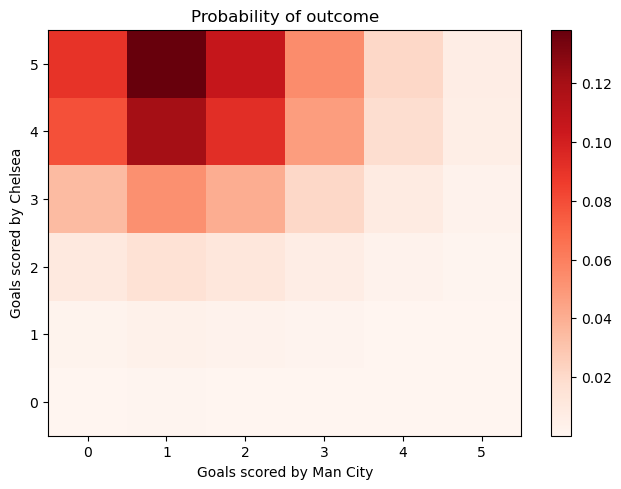

In [54]:
# Code to caluclate the goals for the match.
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team,max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

## Bundesliga FC BM vs Bremen

In [55]:
#prediction before the match
bl = pd.read_csv('D1.csv')
bl = bl[['HomeTeam','AwayTeam','FTHG','FTAG']]
bl = bl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})

In [56]:
goal_model_data_bl = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           bl[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data_bl,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  271
Model:                            GLM   Df Residuals:                      197
Model Family:                 Poisson   Df Model:                           73
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -354.00
Date:                Sun, 28 Jan 2024   Deviance:                       194.14
Time:                        14:54:49   Pearson chi2:                     166.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1394      0.089      1.560      0.119      -0.036       0.314
team[T.Aston Villa]              0.3555      0.363      0.979      0.328      -0.356       1.067
team[T.Augsburg]                -0.1124      0.355     -0.317      0.751      -0.807       0.582
team[T.Bayern Munich]            0.7752      0.250      3.103      0.002       0.286       1.265
team[T.Bochum]                  -0.6429      0.402     -1.599      0.110      -1.431       0.145
team[T.Bournemouth]             -1.1138      0.495     -2.250      0.024      -2.084      -0.143
team[T.Brentford]               -0.3769      0.405     -0.930      0.352      -1.171       0.417
team[T.Brighton]                -0.3977      0.380     -1.047      0.295      -1.142       0.347
team[T.Burnley]                 -1.1941      0.573     -2.085      0.037      -2.317      -0.072
team[T.Chelsea]                 -0.8992      0.507     -1.775      0.076      -1.892       0.094
team[T.Crystal Palace]          -0.9000      0.497     -1.812      0.070      -1.873       0.073
team[T.Darmstadt]                0.0884      0.323      0.273      0.785      -0.546       0.722
team[T.Dortmund]                 0.4786      0.259      1.850      0.064      -0.028       0.986
team[T.Ein Frankfurt]            0.0605      0.293      0.206      0.837      -0.514       0.635
team[T.Everton]                 -1.3136      0.538     -2.442      0.015      -2.368      -0.259
team[T.FC Koln]                 -1.0621      0.485     -2.188      0.029      -2.014      -0.111
team[T.Freiburg]                -0.1651      0.355     -0.466      0.641      -0.860       0.530
team[T.Fulham]                  -1.2381      0.571     -2.170      0.030      -2.356      -0.120
team[T.Heidenheim]               0.0370      0.338      0.110      0.913      -0.625       0.699
team[T.Hoffenheim]               0.5037      0.256      1.970      0.049       0.003       1.005
team[T.Leverkusen]               0.6633      0.253      2.626      0.009       0.168       1.158
team[T.Liverpool]               -0.0377      0.384     -0.098      0.922      -0.790       0.715
team[T.Luton]                   -1.2867      0.575     -2.237      0.025      -2.414      -0.159
team[T.M'gladbach]               0.4634      0.250      1.856      0.063      -0.026       0.953
team[T.Mainz]                   -0.5460      0.349     -1.566      0.117      -1.229       0.137
team[T.Man City]                 0.0580      0.387      0.150      0.881      -0.700       0.816
team[T.Man United]              -0.8193      0.459     -1.786      0.074      -1.718       0.080
team[T.Newcastle]                0.0454      0.405      0.112      0.911      -0.749       0.840
team[T.Nott'm Forest]           -0.6763      0.448     -1.510      0.131    

In [57]:
# Set teams here
home_team='Bayern Munich'
away_team='Werder Bremen'

#Predict for Bayern Munich vs. Werder Bremen
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Lets just get a result
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Bayern Munich against Werder Bremen expect to score: 1    3.054134
dtype: float64
Werder Bremen against Bayern Munich expect to score: 1    0.439399
dtype: float64
Bayern Munich: 2
Werder Bremen: 0
